# Obtaining OAuth2 access

Installing requests and importing the required modules.

In [ ]:
!pip install requests

In [45]:
import json
import requests

Saving the credentials to variables to access them more easily. These credentials are unique to each Spotify user.

In [46]:
client_id = __________________
client_secret = ___________________

Encode the client secret using base 64 encoder online or import base64:

In [47]:
encoded_client_creds = ____________________

Obtain the code that pops up in the URL bar when running the get_code.py Flask file. Enter your client ID and client secret, click the top submit button, not the bottom one. It will redirect to the same page but with the code in the url bar.

In [119]:
code=________________________

Creating variables and dicts to hold request info

In [120]:
import base64
auth_header = base64.urlsafe_b64encode(f'{client_id}:{client_secret}'.encode('ascii'))
token_url = "https://accounts.spotify.com/api/token"
token_data = {
    'grant_type':'authorization_code',
    'code': code,
    'redirect_uri': 'http://127.0.0.1:5000/' # running the get_code.py program locally
}
token_headers = {
    # "Authorization": f"Basic {encoded_client_creds}"
    'Authorization': f'Basic {auth_header.decode("ascii")}' # or just encoded_client_creds here
}

Sending POST request to obtain token and saving to token_response_data

In [121]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json())
token_response_data = r.json()
# note: this access token will have expired by the time this is made public on github

{'access_token': 'BQDbXxvkpNNnCQdkAcXp-qCJXs0T4yHn04v5phSuEHWVQm2JznXl7sUGDGcBYGYVDLJTsW5GcvF73C-edz3Sn8XT60OJrXdI-k9dWq21G-recuYboHFDLedQ1RvVixIpueWXnjJMBNCdrw49zYIfcl2XoFMD5uYdnj8aUWj4gSJjNy9HNzTegl8ZQHtA9ju4RgKXAuX1I03qxBcdV6qqED7-cmOm7satel9d3uRwHI8SWMkIFm4ulX0bfFiI6pMB9yJtB3qgsqUFMg', 'token_type': 'Bearer', 'expires_in': 3600, 'refresh_token': 'AQAA6k5mFW-m7QxbgGeU7THFQl-WW2KzbXWZX4CZK9EazaWA4_N-dSHHHd4QogBKDwABgYyRTX4g2iVZmBd_SaKzVquEc6hGYQXlHdmBobSlRMzKFmFxfid0BbxCHihPmrs', 'scope': 'user-library-read playlist-modify-private playlist-modify-public'}


Verifying that the access token can be accessed

In [122]:
token_response_data['access_token']

'BQDbXxvkpNNnCQdkAcXp-qCJXs0T4yHn04v5phSuEHWVQm2JznXl7sUGDGcBYGYVDLJTsW5GcvF73C-edz3Sn8XT60OJrXdI-k9dWq21G-recuYboHFDLedQ1RvVixIpueWXnjJMBNCdrw49zYIfcl2XoFMD5uYdnj8aUWj4gSJjNy9HNzTegl8ZQHtA9ju4RgKXAuX1I03qxBcdV6qqED7-cmOm7satel9d3uRwHI8SWMkIFm4ulX0bfFiI6pMB9yJtB3qgsqUFMg'

Creating variables and dicts to hold playlist creation request info. Parameters can be found here https://developer.spotify.com/documentation/web-api/reference/create-playlist

In [55]:
user_id = ____________________________- # substitute username as a string here
playlist_url = f"https://api.spotify.com/v1/users/{user_id}/playlists"
method = 'POST'
token_headers = {
    "Authorization": f"Bearer {token_response_data['access_token']}",
    "Content-Type": 'application/json'
}
token_data = { # stuff about the playlist
    "name": "super swag music", 
    "description": "Test playlist description", 
    "public": False
}

Running this cell creates a new playlist!

In [32]:
r = requests.post(playlist_url, data=json.dumps(token_data), headers=token_headers)
print(r.json())
playlist_create_response = r.json()

{'collaborative': False, 'description': 'Test playlist description', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/0iaec6gt76Hwy1FezmsNBE'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/playlists/0iaec6gt76Hwy1FezmsNBE', 'id': '0iaec6gt76Hwy1FezmsNBE', 'images': [], 'name': 'Classical Music', 'owner': {'display_name': 'lauren sun', 'external_urls': {'spotify': 'https://open.spotify.com/user/jg5cbemqytn2p6s1xmvs87o8y'}, 'href': 'https://api.spotify.com/v1/users/jg5cbemqytn2p6s1xmvs87o8y', 'id': 'jg5cbemqytn2p6s1xmvs87o8y', 'type': 'user', 'uri': 'spotify:user:jg5cbemqytn2p6s1xmvs87o8y'}, 'primary_color': None, 'public': False, 'snapshot_id': 'MSxmYTc1YTcyYWYxMGRiZjQ0OGUwOGM3ODVkMDUwMzIyYTI2NTA4OGJk', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/0iaec6gt76Hwy1FezmsNBE/tracks', 'items': [], 'limit': 100, 'next': None, 'offset': 0, 'previous': None, 'total': 0}, 'type': 'playlist', 'uri': 'spotify:playlist:0iaec6gt76Hwy1FezmsNBE

# Adding Songs

Required parameters can be found here: https://developer.spotify.com/documentation/web-api/reference/add-tracks-to-playlist. Track ID is the string of characters obtained from right clicking a song > Share > Copy Song Link after "track/" and before "?si="

In [41]:
playlist_id = playlist_create_response['id']
track_url = 'https://api.spotify.com/v1/playlists/' + playlist_id + '/tracks'

headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}",
    'Content-Type': 'application/json'
}
add_data = {
    'uris': ['spotify:track:12O9MpMmewwdDkxZC9uqvS'],
    "position": 0
}

Send a request to add "Strange Weather" by Slaughter Beach, Dog to this playlist

In [42]:
r = requests.post(track_url, data=json.dumps(add_data), headers=headers)
print(r.json())
add_track_response = r.json()

{'snapshot_id': 'NCxjNmY5Njk4NDU1ZmE2MTk2YzZkMDkxY2YxNDQ0NTY4Yzg1ZTgwYzE0'}


# Retrieving Saved Songs

From https://developer.spotify.com/documentation/web-api/reference/get-users-saved-tracks. Make sure that in the get_code.py file, there's a user-library-read in the scope line.

In [56]:
method = 'GET'
library_url = 'https://api.spotify.com/v1/me/tracks'
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}"
}


Import songs 1 at a time into pandas df (API only retrieves 50 songs at once)

In [57]:
import pandas as pd

In [58]:
songs = pd.DataFrame()

In [81]:
for i in range(35):
    saved_songs = requests.get(library_url, {
            "limit": 50,
            "offset": i*50
        },
        headers=headers)
    newsongs = pd.DataFrame(saved_songs.json())
    songs = pd.concat([songs, newsongs])

print(saved_songs.json())

{'href': 'https://api.spotify.com/v1/me/tracks?offset=1700&limit=50', 'items': [{'added_at': '2018-07-30T23:08:50Z', 'track': {'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR',

# Analyzing saved songs!

What does one entry look like?

In [123]:
songs

,href,items,limit,next,offset,previous,total,error
0,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2023-12-17T04:45:12Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=50...,0.0,None,1702.0,NaN
1,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2023-12-17T04:41:08Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=50...,0.0,None,1702.0,NaN
2,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2023-12-17T04:04:54Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=50...,0.0,None,1702.0,NaN
3,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2023-12-17T03:30:26Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=50...,0.0,None,1702.0,NaN
4,https://api.spotify.com/v1/me/tracks?offset=0&...,"{'added_at': '2023-12-17T03:22:49Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=50...,0.0,None,1702.0,NaN
...,...,...,...,...,...,...,...,...
47,https://api.spotify.com/v1/me/tracks?offset=16...,"{'added_at': '2018-07-30T23:09:00Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=17...,1650.0,https://api.spotify.com/v1/me/tracks?offset=16...,1702.0,NaN
48,https://api.spotify.com/v1/me/tracks?offset=16...,"{'added_at': '2018-07-30T23:08:59Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=17...,1650.0,https://api.spotify.com/v1/me/tracks?offset=16...,1702.0,NaN
49,https://api.spotify.com/v1/me/tracks?offset=16...,"{'added_at': '2018-07-30T23:08:55Z', 'track': ...",50.0,https://api.spotify.com/v1/me/tracks?offset=17...,1650.0,https://api.spotify.com/v1/me/tracks?offset=16...,1702.0,NaN
0,https://api.spotify.com/v1/me/tracks?offset=17...,"{'added_at': '2018-07-30T23:08:50Z', 'track': ...",50.0,None,1700.0,https://api.spotify.com/v1/me/tracks?offset=16...,1702.0,NaN


In [91]:
song_sample = list(songs['items'])

What's the format/shape of data?

In [88]:
len(song_sample)

4790

In [96]:
song_sample[4789]

{'added_at': '2018-07-30T23:08:49Z',
 'track': {'album': {'album_type': 'compilation',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
     'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
     'id': '0LyfQWJT6nXafLPZqxe9Of',
     'name': 'Various Artists',
     'type': 'artist',
     'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD',
    'LI

Iterate through each entry in `songs['items']` which really has all the song info. That song has `track` column, and that column's `id` column contains the id. 

In [125]:
for item in songs['items']:
    if item['track']
    print(item['track']['id'])

2Kj95VOpBEJzBFNzwirZwU
4fmKPdLwdQZLsEnRGAJ2n6
6L3wRxlBzVvBgEbvKsVPMQ
4vBRCHVRvaUh33cqiQ7Qf9
06DmKXZoJUSUWnhaA263mU
3KqVu4R7KlYZGQaKvsRX13
0XI5s6LiZPQipNeZOiQHxE
4Mve2PSQqMtVn5DemVoBYr
2VYnlKxB8jpbCeLUjQsebc
4xfAVJL8R7mVYbDk8a9xOY
15kZhDcU7ccboIiMopQLzN
3c7N2fCFB4JVKGF8cWfteh
0qRR9d89hIS0MHRkQ0ejxX
7jIAttgQTpLDoNtykIQXjH
0LrwgdLsFaWh9VXIjBRe8t
4alHo6RGd0D3OUbTPExTHN
5GGTgkmfEzkhAfmG0hxXk9
2TVxnKdb3tqe1nhQWwwZCO
6tPiCU4LFsXUQPRIykOAnl
48Qes8IUekSZpcNDQgYzUX
3M2bD9SMYnJIPdrTKUnBd3
41nIJErYY9goKvnCyG7ov6
7JEzAlwHhCD2M1cYE6BeqJ
4HqRhdpxH9zFUkf1kzbr3H
5T00EN4oZmDQx3hqVAC4Fx
2WtFN7eLf5gvhJNgwBvGP6
09hBncDVrluWW1K4EkhnAy
5MoLSEv2WjI8a7G3HLYH4o
21lfQ6cXJF15ubyPLB6qHz
0IbC2aDg9yOZCcchAgCu4e
0Fbmu6lw7dJboUPNz0NEJo
3vkCueOmm7xQDoJ17W1Pm3
5PQmSHzWnlgG4EBuIqjac2
3wQ8RcbLwNRH53FelAVCkX
7qdo6JOOaaY9LadOAhfXq7
48X4D1FYOShPz2VF3YdfCF
2SHTKB8YYlawTGIuJ2b2ok
1o6DclZHw0HomxXEQR1ijX
3IvTwPCCjfZczCN2k4qPiH
1H7gMYGykdtwZOV6s1N0by
58oHt6vNUwhLArAlWJkXAq
64D3dzWyj0GpQT1AHx4kbK
2tjskutXjrrfAyoSw4q4kb
4ywWJqYKOwa

TypeError: 'float' object is not subscriptable

trouble shoot why list comprehension doesn't work:

In [127]:
track_ids = []
for item in songs['items']:
    try:
        track_id = item['track']['id']
        track_ids.append(track_id)
    except (TypeError, KeyError) as e:
        print(f"Error processing item: {item}, Error: {e}")


Error processing item: nan, Error: 'float' object is not subscriptable
Error processing item: nan, Error: 'float' object is not subscriptable
Error processing item: nan, Error: 'float' object is not subscriptable
Error processing item: nan, Error: 'float' object is not subscriptable


list comprehension with type check:

In [135]:
track_ids = [item['track']['id'] for item in songs['items'] if not isinstance(item, float)]

In [137]:
track_ids

['2Kj95VOpBEJzBFNzwirZwU',
 '4fmKPdLwdQZLsEnRGAJ2n6',
 '6L3wRxlBzVvBgEbvKsVPMQ',
 '4vBRCHVRvaUh33cqiQ7Qf9',
 '06DmKXZoJUSUWnhaA263mU',
 '3KqVu4R7KlYZGQaKvsRX13',
 '0XI5s6LiZPQipNeZOiQHxE',
 '4Mve2PSQqMtVn5DemVoBYr',
 '2VYnlKxB8jpbCeLUjQsebc',
 '4xfAVJL8R7mVYbDk8a9xOY',
 '15kZhDcU7ccboIiMopQLzN',
 '3c7N2fCFB4JVKGF8cWfteh',
 '0qRR9d89hIS0MHRkQ0ejxX',
 '7jIAttgQTpLDoNtykIQXjH',
 '0LrwgdLsFaWh9VXIjBRe8t',
 '4alHo6RGd0D3OUbTPExTHN',
 '5GGTgkmfEzkhAfmG0hxXk9',
 '2TVxnKdb3tqe1nhQWwwZCO',
 '6tPiCU4LFsXUQPRIykOAnl',
 '48Qes8IUekSZpcNDQgYzUX',
 '3M2bD9SMYnJIPdrTKUnBd3',
 '41nIJErYY9goKvnCyG7ov6',
 '7JEzAlwHhCD2M1cYE6BeqJ',
 '4HqRhdpxH9zFUkf1kzbr3H',
 '5T00EN4oZmDQx3hqVAC4Fx',
 '2WtFN7eLf5gvhJNgwBvGP6',
 '09hBncDVrluWW1K4EkhnAy',
 '5MoLSEv2WjI8a7G3HLYH4o',
 '21lfQ6cXJF15ubyPLB6qHz',
 '0IbC2aDg9yOZCcchAgCu4e',
 '0Fbmu6lw7dJboUPNz0NEJo',
 '3vkCueOmm7xQDoJ17W1Pm3',
 '5PQmSHzWnlgG4EBuIqjac2',
 '3wQ8RcbLwNRH53FelAVCkX',
 '7qdo6JOOaaY9LadOAhfXq7',
 '48X4D1FYOShPz2VF3YdfCF',
 '2SHTKB8YYlawTGIuJ2b2ok',
 

## Get client_credentials access token

In [138]:
auth_header = base64.urlsafe_b64encode(f'{client_id}:{client_secret}'.encode('ascii'))
token_url = "https://accounts.spotify.com/api/token"
token_data = {
    'grant_type':'client_credentials',
    'code': code,
    'redirect_uri': 'http://127.0.0.1:5000/' # running the get_code.py program locally
}
token_headers = {
    # "Authorization": f"Basic {encoded_client_creds}"
    'Authorization': f'Basic {auth_header.decode("ascii")}' # or just encoded_client_creds here
}

In [143]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json())
token_response_data = r.json()

{'access_token': 'BQDMrU348_tt6Iz5U7RsX1bc0QNKO5S0UCbWcEFh6w8NcEHCeDM3UtCS8hkQBi9xQXQuQjSODOQMKifZ4GVllnv8QP9xgynvRQzZWFs66NbRYUPPKSE', 'token_type': 'Bearer', 'expires_in': 3600}


Write the body of the request, now with the access token that has client_credentials permissions. Can't do the get request without switching to client_credentials

In [144]:
song_url = f"https://api.spotify.com/v1/audio-features/{id}"
headers = {
    'Authorization': F"Bearer {token_response_data['access_token']}",
    'Content-Type': 'application/json'
}

Loop through every ID in song_ids. Send an API call to get their features.
TODO: USE THE MULTIPLE SONGS ENDPOINT

In [ ]:
r = requests.get(f"https://api.spotify.com/v1/audio-features/{track_ids[0]}", headers=headers).json()

In [145]:
audio_features = [requests.get(f"https://api.spotify.com/v1/audio-features/{id}", headers=headers).json() for id in track_ids]

ConnectionError: HTTPSConnectionPool(host='api.spotify.com', port=443): Max retries exceeded with url: /v1/audio-features/6Q9kdCHXpAef5YbKXKeG9M (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C3D6720520>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

# df of audio features to analyze!

In [142]:
afdf = pd.DataFrame(audio_features)
afdf['error'][0]

{'status': 401, 'message': 'The access token expired'}

## plot stuff

In [208]:
import matplotlib.pyplot as plt

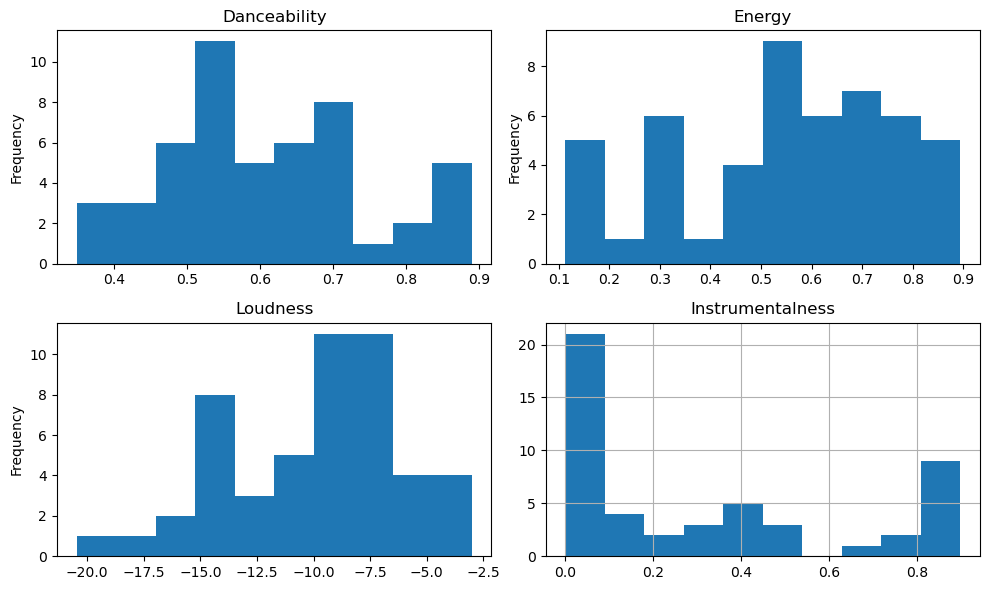

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
afdf['danceability'].plot.hist(ax=axes[0, 0])
axes[0,0].set_title('Danceability')
afdf['energy'].plot.hist(ax=axes[0, 1])
axes[0,1].set_title('Energy')
afdf['loudness'].plot.hist(ax=axes[1, 0])
axes[1,0].set_title('Loudness')
afdf['instrumentalness'].hist(ax=axes[1, 1])
axes[1,1].set_title('Instrumentalness')

plt.tight_layout()


## lyrics

In [117]:
lyricurl = 'https://spotify-lyric-api-984e7b4face0.herokuapp.com/?trackid=12O9MpMmewwdDkxZC9uqvS'
lyric_data = {
    "trackid": '12O9MpMmewwdDkxZC9uqvS'
}
r = requests.get(lyricurl, data=lyric_data)


In [118]:
print(r.json())

{'error': False, 'syncType': 'LINE_SYNCED', 'lines': [{'startTimeMs': '12510', 'words': 'Strange weather in Tokyo', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '22050', 'words': 'If I saw the light, would I know?', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '28480', 'words': 'She tiptoes to me in her sleeping clothes', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '34640', 'words': 'A million different people go to work', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '40970', 'words': '♪', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '44260', 'words': 'Strange letters you left to me', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '53750', 'words': 'Burning in my drawer on the bowery', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '60390', 'words': 'Letters I cannot bear to read', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '66920', 'words': 'Far away from me as I can be', 'syllables': [], 'endTimeMs': '0'}, {'startTimeMs': '73060'